In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy.stats import chi2_contingency



In [3]:
df = pd.read_csv('../data/N3C_data_10000_sample.csv')
df.head()

,Unnamed: 0,conditions,age,severity_covid_death,outcome,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,...,vilazodone,vortioxetine,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline
0,1,"[78473, 137548, 4236484, 37311338, 37311341]",41.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"[195867, 197684, 201078, 4031128, 4289526, 370...",62.0,0,1,970,38003563.0,8532.0,8527.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"[133834, 140214, 438134, 438398, 442588, 44413...",26.0,0,1,463,0.0,8507.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"[25297, 254761]",38.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"[77670, 134222, 137989, 140273, 194133, 254761...",43.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   conditions            10000 non-null  object 
 2   age                   10000 non-null  float64
 3   severity_covid_death  10000 non-null  int64  
 4   outcome               10000 non-null  int64  
 5   zip                   10000 non-null  int64  
 6   ethnicity_concept_id  10000 non-null  float64
 7   gender_concept_id     10000 non-null  float64
 8   race_concept_id       10000 non-null  float64
 9   trazodone             10000 non-null  float64
 10  amitriptyline         10000 non-null  float64
 11  fluoxetine            10000 non-null  float64
 12  citalopram            10000 non-null  float64
 13  paroxetine            10000 non-null  float64
 14  venlafaxine           10000 non-null  float64
 15  vilazodone          

C:\Users\thang\AppData\Local\Temp\ipykernel_29524\542529088.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1950x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1950x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

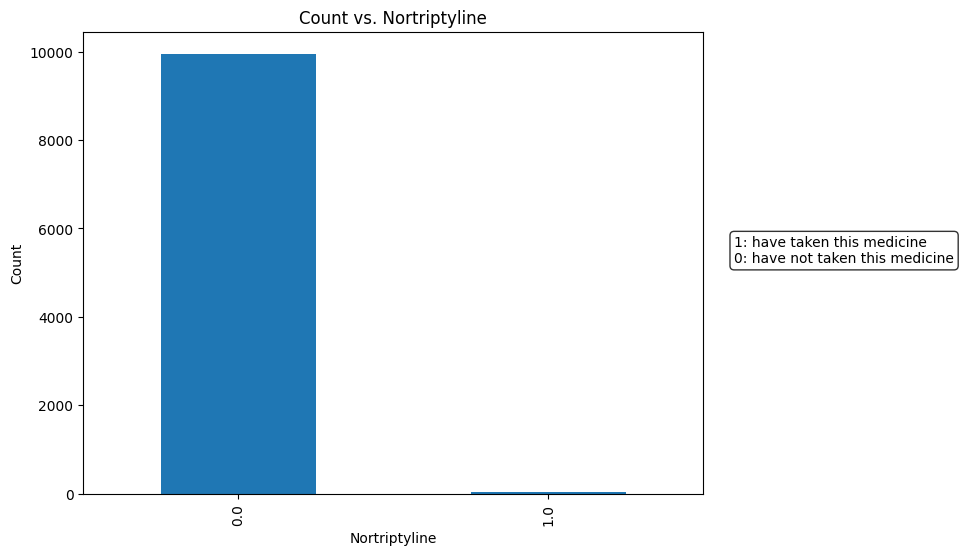

In [ ]:
cols = [ 'age', 'outcome', 'zip', 'gender_concept_id', 'ethnicity_concept_id', 'race_concept_id', 'trazodone', 'amitriptyline',
        'fluoxetine', 'citalopram', 'paroxetine', 'venlafaxine', 'vilazodone', 'vortioxetine', 'sertraline', 'bupropion',
        'mirtazapine', 'desvenlafaxine', 'doxepin', 'duloxetine', 'escitalopram', 'nortriptyline']

for col in cols:
    plt.clf()
    plt.figure(figsize=(8, 6))
    counts = df[col].value_counts()
    
    if col == "age" or col == "zip":
        plt.figure(figsize=(19.5, 6))
        if col == 'zip':
            counts = counts[counts > 200]
    if col == 'outcome':
        explanation=("1: recovered/mild covid effect after treatment\n 0: death/severe covid effect after treatment")
        plt.text(
        x=1.05, y=0.5,  # Position (adjust as needed)
        s=explanation,
        transform=plt.gca().transAxes,  # Use axis-relative coordinates
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round')
        )
    elif col not in ['zip', 'age', 'gender_concept_id', 'ethnicity_concept_id', 'race_concept_id']:
        explanation=("1: taken this medicine\n0: taken this medicine")
        plt.text(
        x=1.05, y=0.5,  # Position (adjust as needed)
        s=explanation,
        transform=plt.gca().transAxes,  # Use axis-relative coordinates
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))
    
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count vs. {col.capitalize()}')

    # Save the figure
    plt.savefig(f'../data/plots/{col}.png', dpi=300, bbox_inches='tight') 


In [36]:
import matplotlib.pyplot as plt
import numpy as np

cols = [ 'age', 'zip', 'gender_concept_id', 'ethnicity_concept_id', 'race_concept_id', 'trazodone', 'amitriptyline',
        'fluoxetine', 'citalopram', 'paroxetine', 'venlafaxine', 'vilazodone', 'vortioxetine', 'sertraline', 'bupropion',
        'mirtazapine', 'desvenlafaxine', 'doxepin', 'duloxetine', 'escitalopram', 'nortriptyline']

for col in cols:
    plt.clf()
    fig, ax = plt.subplots(figsize=(10, 6))

    # Make the plot larger for certain columns
    if col in ["age", "zip"]:
        fig.set_size_inches(19.5, 6)

    # Group and pivot by outcome
    grouped = df.groupby([col, 'outcome']).size().unstack(fill_value=0)

    # Optional filter for 'zip'
    if col == 'zip':
        grouped = grouped[grouped.sum(axis=1) > 200]

    # Plot manually with matplotlib for full control
    x = np.arange(len(grouped))  # category positions
    width = 0.35

    bar1 = ax.bar(x - width/2, grouped[0], width, label='Outcome 0')
    bar2 = ax.bar(x + width/2, grouped[1], width, label='Outcome 1')

    # Add labels
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Count vs. {col.capitalize()} by Outcome')
    ax.set_xticks(x)
    ax.set_xticklabels(grouped.index, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()

    # Add text labels on bars
    for bars in [bar1, bar2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width()/2, height,
                    str(int(height)),
                    ha='center', va='bottom', fontsize=8
                )

    # Add explanation if it's a binary drug feature
    if col not in ['zip', 'age', 'gender_concept_id', 'ethnicity_concept_id', 'race_concept_id']:
        explanation = "1: taken the medicine\n0: not taken the medicine"
        ax.text(
            1.02, 0.5, explanation,
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round')
        )

    # Save
    plt.savefig(f'../data/plots/{col}.png', dpi=300, bbox_inches='tight')
    plt.close()


<Figure size 640x480 with 0 Axes>

In [43]:
high_correlation_features = []
for col in cols:
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[col], df['outcome'])

    #print("Contingency Table:")
    #print(contingency_table)
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Output the results
    #print(f"\nChi-squared Statistic: {chi2}")
    #print(f"P-value: {p}")
    #print(f"Degrees of Freedom: {dof}")
    #print(f"Expected frequencies table:\n{expected}")

    # Interpret the result
    alpha = 0.05  # Significance level (5%)
    
    if p < alpha: # reject the null hypothesis
        high_correlation_features.append(col)
print(high_correlation_features)
        

['age', 'zip', 'gender_concept_id', 'ethnicity_concept_id', 'race_concept_id', 'trazodone', 'paroxetine', 'sertraline', 'mirtazapine', 'duloxetine']
